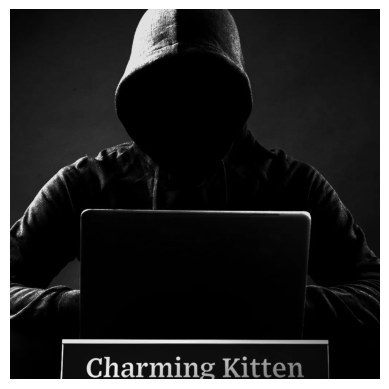

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow.keras.layers as ll

def grayscale_and_pad(image_path):
    original_image = Image.open(image_path)
    grayscale_image = original_image.convert('L')
    target_width, target_height = 1024, 1024
    pad_width = (target_width - grayscale_image.width) // 2
    pad_height = (target_height - grayscale_image.height) // 2
    padded_image = Image.new('L', (target_width, target_height), color='white')
    padded_image.paste(grayscale_image, (pad_width, pad_height))
    image_array = np.array(padded_image)
    return image_array

# Load and preprocess the output image (grayscale and padded)
output_image_path = 'security_hacker_names.webp'
output_image = grayscale_and_pad(output_image_path)

# Display the image
plt.imshow(output_image, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [18]:
flattened_image = output_image.reshape(-1,1)
sorted_image = np.sort(flattened_image, axis=0)
changed_pixels = []
for i in range(len(flattened_image)-1):
    if flattened_image[i] != flattened_image[i+1]:
        changed_pixels.append(i)

sorted_output_image = sorted_image.reshape(output_image.shape)


In [31]:
model = tf.keras.Sequential([
    ll.Dense(10, activation='tanh', input_shape=(1,)),
    ll.Dense(10, activation='tanh'),
    ll.Dense(10, activation='tanh'),
    ll.Dense(10, activation='relu'),
    ll.Dense(10, activation='relu'),
    ll.Dense(10, activation='relu'),
    ll.Dense(1, activation='relu'),
])
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
trainx = []
for i in range(1024*1024):
    trainx.append([i])

In [23]:
# Define the neural network model
model = tf.keras.Sequential([
    ll.InputLayer(input_shape=(2,)),
    ll.Dense(1024, activation='relu'),
    ll.Dense(sorted_image.shape[0], activation='relu'),
    ll.Reshape(output_shape=flattened_image.shape)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

TypeError: Reshape.__init__() missing 1 required positional argument: 'target_shape'

In [ ]:

# Train the model (you may need to adjust this based on your data)
model.fit(x=sorted_image, y=output_image, epochs=10, batch_size=32)

# Once trained, you can use the model to predict the flattened image
predicted_flattened_image = model.predict(sorted_image)

# Reshape the predicted flattened image to its original shape
predicted_output_image = predicted_flattened_image.reshape(output_image.shape)

# Display the predicted image
plt.imshow(predicted_output_image, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()